# Rotate

In [2]:
(ns dry-spring
   (:require
    [opencv4.core :refer :all]
    [opencv4.utils :as u]))

nil

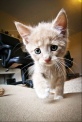

In [3]:
(def neko (imread "resources/chapter02/ai3.jpg" IMREAD_REDUCED_COLOR_8))
(u/>>> neko)

### Rotate

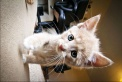

In [4]:
(->  neko
     clone
     (rotate! ROTATE_90_CLOCKWISE)
     (u/>>>))

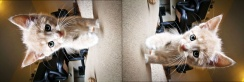

In [5]:
(->> [ROTATE_90_COUNTERCLOCKWISE ROTATE_90_CLOCKWISE]
     (map #(-> neko clone (rotate! %)))
     (hconcat!)
     (u/>>>))

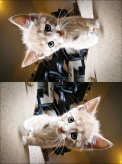

In [6]:
(->> [ROTATE_90_COUNTERCLOCKWISE ROTATE_90_CLOCKWISE]
     (map #(-> neko clone (rotate! %)))
     (vconcat!)
     (u/>>>))

### Flipping

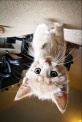

In [7]:
(->  neko
     (clone)
     (flip! 0)
     (u/>>>))

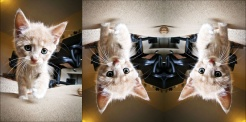

In [8]:
(->> [1 -1 0]
     (map #(-> neko clone (flip! %)))
     (hconcat!)
     (u/>>>))

### Rotate-by

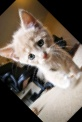

In [10]:
(def img (clone neko))

(def rotation-angle 45)
(def matrix
  (get-rotation-matrix-2-d
    (new-point (/ (.width img) 2) (/ (.height img) 2)) rotation-angle 1))

(warp-affine! img matrix (.size img))
(u/>>> img)

In [11]:
(defn rotate-by! [img angle]
  (let [M2 (get-rotation-matrix-2-d  (new-point (/ (.width img) 2) (/ (.height img) 2)) angle 1)]
    (warp-affine! img M2 (.size img))))

#'dry-spring/rotate-by!

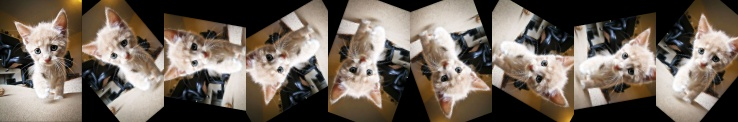

In [12]:
(->> (range 0 360 40)
     (map #(-> neko clone (rotate-by! % )))
     (hconcat!)
     (u/>>>))

In [13]:
(defn rotate-by! 
  ([img angle] (rotate-by! img angle 1))
  ([img angle zoom]
   (let 
     [M2 (get-rotation-matrix-2-d (new-point (/ (.width img) 2) (/ (.height img) 2)) angle zoom)]
    (warp-affine! img M2 (.size img)))))

#'dry-spring/rotate-by!

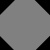

In [15]:
(def m1 (new-mat 5 5 CV_8UC1))
(set-to m1 (new-scalar 128 0 0))
(.dump m1)

(-> (new-mat 50 50 CV_8UC1)
    (set-to (new-scalar 128 0 0))
    (u/>>>))

(-> m1 clone
  (rotate-by! 45)
  (.dump))

(-> (new-mat 50 50 CV_8UC1)
    (set-to (new-scalar 128 0 0))
    (rotate-by! 45)
    (u/>>>))

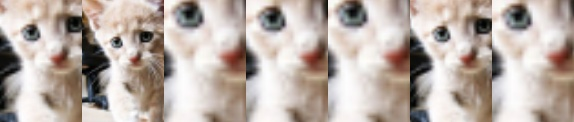

In [16]:
(->> (range 7)
     (map (fn[_] (-> neko clone (rotate-by! 0 (rand 5)))))
     (hconcat!)
     (u/>>>))

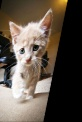

In [18]:
(def src
  (u/matrix-to-matofpoint2f [[0 0] 
                             [5 5] 
                             [4 6]]))
(def dst
  (u/matrix-to-matofpoint2f [[2 0] 
                             [5 5] 
                             [4 6]]))

(def transform-mat (get-affine-transform src dst))
(.dump transform-mat)

(-> neko clone (warp-affine! transform-mat (.size neko)) u/>>>)